# Splitting Descent

In [1]:
import torch
from sandbox import SimpleModel, toy_data, experiment_series, eval_series
from pathlib import Path

In [2]:
model_params = (1, 1, 8, 2, 2)

eps = 1e-4
num_kept_neurons = 2
lr=0.005
runs=10

#0: loss: 0.05293525382876396 - size: 649
#1: loss: 0.18802963197231293 - size: 649
#2: loss: 0.27343717217445374 - size: 649
#3: loss: 0.26187464594841003 - size: 649
#4: loss: 0.1937350481748581 - size: 649
#5: loss: 0.27432045340538025 - size: 649
#6: loss: 0.20261165499687195 - size: 649
#7: loss: 0.18950359523296356 - size: 649
#8: loss: 0.20542967319488525 - size: 649
#9: loss: 0.18108059465885162 - size: 649


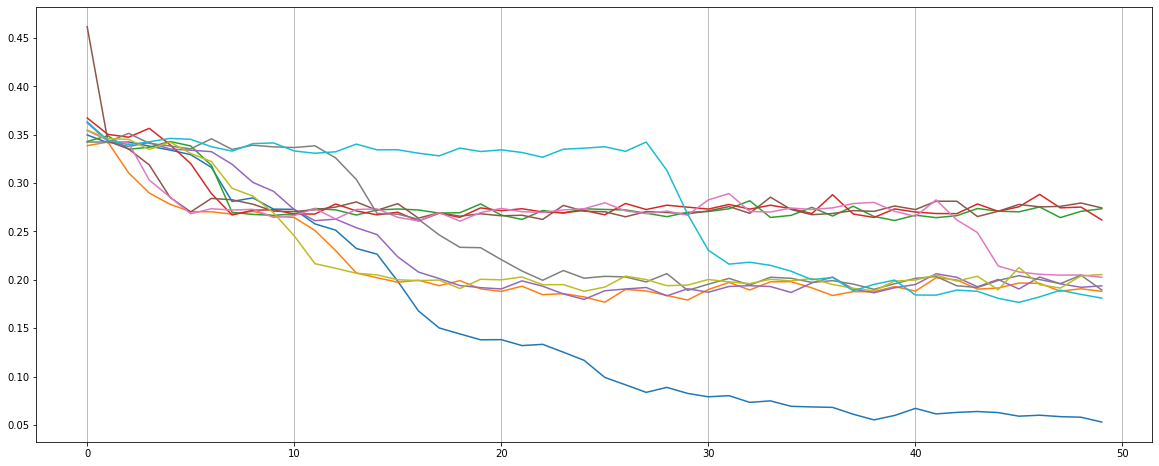

In [3]:
def grow(model):
    selected = [torch.arange(m.hidden_features) for m in (model.a, model.b)]
    model.grow(num_novel=0, eps_novel=eps, eps_split=eps)
    model.degrow(*selected)

series = experiment_series(model_params, runs=runs, grow=grow, lr=lr)

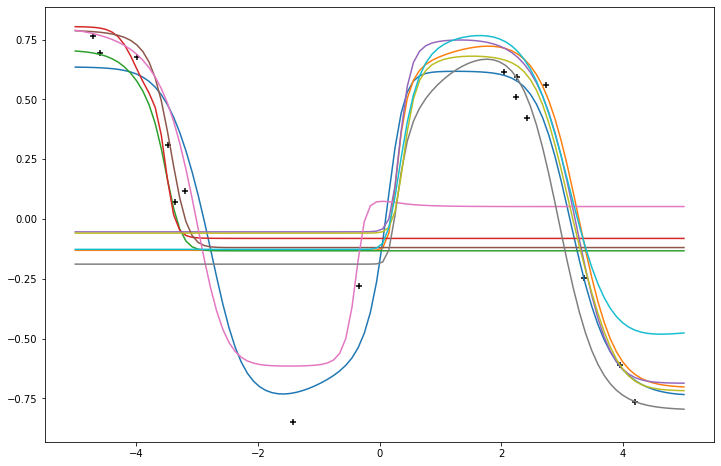

In [4]:
eval_series(series)

In [5]:
d = Path("results")
d.mkdir(parents=True, exist_ok=True)

torch.save(series, d / 'splitting_growth.pt')